# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction

< y >
* **Price** : The price of the used car in INR Lakhs.



< X >
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [2]:
# Load Data
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
pip install -U scikit-learn

^C


Test MSE: 3784652318349.0854


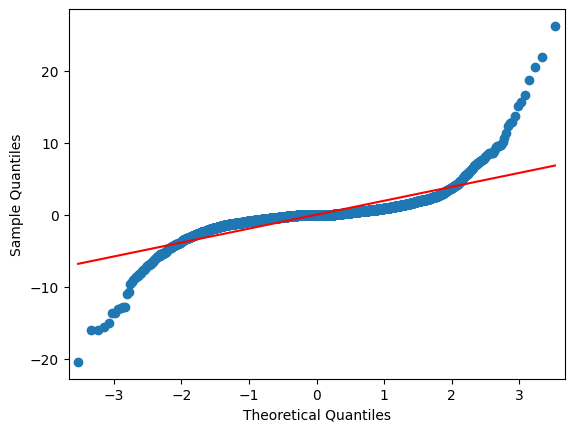

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

# 데이터 전처리
# 결측치 처리 (평균값으로 채워넣기 - 제거하기엔 너무 많음)
data = data.fillna(data.mean())

# 범주형 변수 인코딩
encoder = OneHotEncoder()
categorical_features = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_features))
data = data.join(encoded_features_df).drop(columns=categorical_features)

# 연속형 변수 처리
continuous_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

# # 'Mileage' 컬럼에서 숫자만 추출하여 float 타입으로 변환하는 함수
# def extract_mileage(mileage):
#     if isinstance(mileage, str):  # 데이터가 문자열인 경우
#         return float(mileage.split()[0])  # 첫 번째 공백 기준으로 분리하고 숫자 부분을 float으로 변환
#     return mileage  # 이미 숫자인 경우 그대로 반환

# # 'Mileage' 컬럼에 함수 적용
# data['Mileage'] = data['Mileage'].apply(extract_mileage)

# 문자열 컬럼에서 숫자만 추출하여 float으로 변환하는 함수
def extract_numeric(value):
    try:
        return float(''.join(filter(str.isdigit, value.split()[0])))
    except (ValueError, AttributeError):
        return np.nan

# 'Mileage', 'Engine', 'Power', 'New_Price' 컬럼에 함수 적용
data['Mileage'] = data['Mileage'].apply(extract_numeric)
data['Engine'] = data['Engine'].apply(extract_numeric)
data['Power'] = data['Power'].apply(extract_numeric)
data['New_Price'] = data['New_Price'].apply(extract_numeric)

# 결측값을 처리합니다. 평균으로 대체.
data['Mileage'].fillna(data['Mileage'].mean(), inplace=True)
data['Engine'].fillna(data['Engine'].mean(), inplace=True)
data['Power'].fillna(data['Power'].mean(), inplace=True)
data['New_Price'].fillna(data['New_Price'].mean(), inplace=True)

# X(독립변수)와 y(종속변수) 분리
X = data[continuous_features + list(encoded_features_df.columns)]
y = data['Price']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')

# 회귀 진단
y_pred_train = model.predict(X_train)
residuals = y_train - y_pred_train
sm.qqplot(residuals, line='s')
plt.show()


결측치를 제거하고 범주형 변수를 원-핫 인코딩으로 변환합니다. 연속형 변수는 그대로 사용합니다. 그런 다음, 독립변수 X와 종속변수 y를 정의하고, 데이터를 훈련 및 테스트 세트로 분리합니다. LinearRegression 모델을 훈련하고, 테스트 세트에서의 MSE를 계산하여 모델의 성능을 평가합니다. 마지막으로 statsmodels의 Q-Q 플롯을 사용하여 잔차의 정규성을 검사하는 회귀 진단을 수행합니다.

In [5]:
#결측치 제거한 후
print(data.columns)

for col in categorical_features:
    if col not in data.columns:
        print(f'{col} is not in DataFrame columns')

Index(['Unnamed: 0', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price', 'Name_Ambassador Classic Nova Diesel',
       ...
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object', length=1907)
Name is not in DataFrame columns
Location is not in DataFrame columns
Fuel_Type is not in DataFrame columns
Transmission is not in DataFrame columns
Owner_Type is not in DataFrame columns
